In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/CompanyReviews.csv')
df.head()

,Unnamed: 0,review_description,rating,company
0,0,رائع,1,talbat
1,1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,1,talbat
2,2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,-1,talbat
3,3,لماذا لا يمكننا طلب من ماكدونالدز؟,-1,talbat
4,4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,-1,talbat


In [3]:
# Unnamed: 0 : Index (can be dropped)
# review_description : Arabic text reviews
# rating : Target variable (likely -1 = Negative, 0 = Neutral, 1 = Positive)
# company : Company name (not needed for classification unless doing multi-company comparison)

In [4]:
df['rating'].value_counts()

,count
rating,
1,23921
-1,14200
0,1925


In [5]:
# a. Check Nulls
df.isnull().sum()

,0
Unnamed: 0,0
review_description,1
rating,0
company,0


In [6]:
df.dropna(subset=['review_description'], inplace=True)

#df['review_description'].fillna('MISSING', inplace=True)
#If you want to keep all rows, you can fill the missing text with something like 'MISSING' or 'NO REVIEW PROVIDED'.

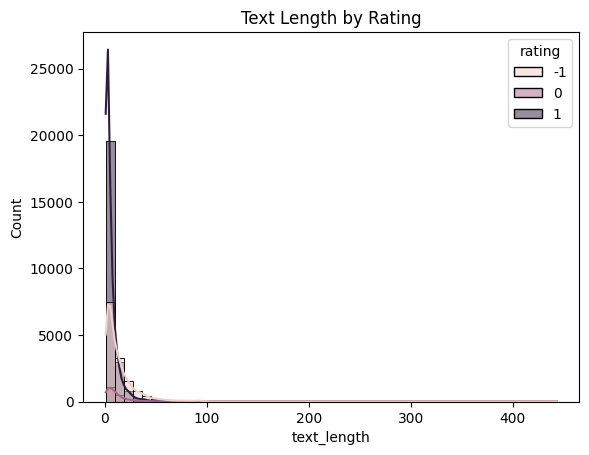

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
# Text Length Analysis
df['text_length'] = df['review_description'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='text_length', hue='rating', bins=50, kde=True)
plt.title('Text Length by Rating')
plt.show()

/tmp/ipython-input-8-4251986308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


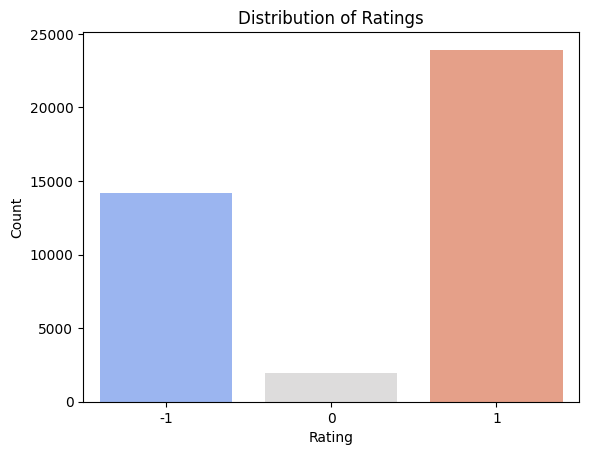

In [8]:
#عدد التقييمات حسب القيمة
# عد التقييمات حسب القيمة (rating)
rating_counts = df['rating'].value_counts().sort_index()

sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [9]:
company_counts = df['company'].value_counts()
print(company_counts)

company
talbat           32072
swvl              4693
telecom_egypt     2090
venus              281
Raya               268
TMG                250
elsewedy           147
hilton             100
capiter             73
Ezz Steel           49
nestle              18
domty                4
Name: count, dtype: int64


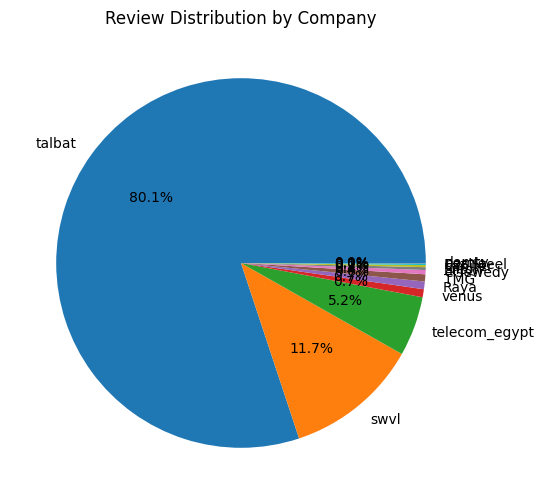

In [10]:
#عدد المراجعات حسب الشركة (إن وجد أكثر من شركة)
# عد المراجعات حسب الشركة
company_counts = df['company'].value_counts()

# رسم بياني دائري
company_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Review Distribution by Company')
plt.ylabel('')
plt.show()

In [11]:
#عرض بعض المراجعات السلبية والإيجابية
# مراجعات إيجابية
print("مراجعات إيجابية:\n", df[df['rating'] == 1]['review_description'].head())

# مراجعات سلبية
print("مراجعات سلبية:\n", df[df['rating'] == -1]['review_description'].head())
print("مراجعات حيادية :\n", df[df['rating'] == 0]['review_description'].head())

مراجعات إيجابية:
 0                                                  رائع
1     برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...
6                                    جميل جدا رائع. . .
9     كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء...
10                                                ممتاز
Name: review_description, dtype: object
مراجعات سلبية:
 2    التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...
3                   لماذا لا يمكننا طلب من ماكدونالدز؟
4    البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...
5                                       أصبح غالي جداً
7    للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف ب...
Name: review_description, dtype: object
مراجعات حيادية :
 45                 تجربه مرضيه والتوصيل كان كويس ومعقول
50    بصراحة تغيير كبير في سياسة طلبات مع الزبائن، ه...
56                      لماذة لا استطيع استخدام القسائم
66                                              جيد جدا
73                                            3w2d32d32
Name: review_description, dtype: 

/tmp/ipython-input-12-47575385.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='Set2')


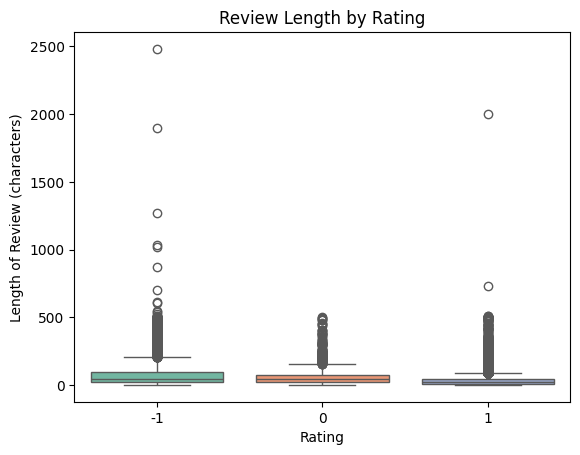

In [12]:
#تحليل طول المراجعة مقابل التقييم
# إضافة عمود لطول المراجعة
df['review_length'] = df['review_description'].astype(str).apply(len)

# رسم علاقة بين طول المراجعة والتقييم
sns.boxplot(x='rating', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Length of Review (characters)')
plt.show()

In [13]:
!pip install wordcloud matplotlib arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 10.7 MB/s eta 0:00:00


In [14]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import arabic_reshaper
from bidi.algorithm import get_display
import re
# إزالة القيم الفارغة
df.dropna(subset=['review_description', 'rating'], inplace=True)

# تنظيف النصوص
def clean_text(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub(r'([^\u0621-\u063A\u0641-\u064A\u06CC\u06DB\u060C\u061B\u061F\u0620])', ' ', text)
    text = re.sub(r'[^\u0621-\u064A\s]', '', str(text))  # أحرف عربية فقط
    return text

df['clean_review'] = df['review_description'].apply(clean_text)

# تقسيم البيانات
X = df['clean_review']
y = df['rating']

# تحويل النص إلى تمثيل رقمي باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(X)

# تقسيم إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# تدريب نموذج Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# تدريب نموذج Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# تقييم النموذجين
print("📊 تقييم Naive Bayes:\n")
print(classification_report(y_test, nb_model.predict(X_test)))

print("📊 تقييم Logistic Regression:\n")
print(classification_report(y_test, lr_model.predict(X_test)))

📊 تقييم Naive Bayes:

              precision    recall  f1-score   support

          -1       0.80      0.77      0.78      2832
           0       0.67      0.00      0.01       405
           1       0.83      0.92      0.87      4772

    accuracy                           0.82      8009
   macro avg       0.76      0.56      0.55      8009
weighted avg       0.81      0.82      0.80      8009

📊 تقييم Logistic Regression:

              precision    recall  f1-score   support

          -1       0.81      0.78      0.79      2832
           0       0.27      0.02      0.03       405
           1       0.84      0.92      0.88      4772

    accuracy                           0.83      8009
   macro avg       0.64      0.57      0.57      8009
weighted avg       0.80      0.83      0.80      8009



In [15]:
# مراجعات جديدة للتجربة
new_reviews = [
    "التطبيق ممتاز وسهل الاستخدام",
    "لا يعمل التطبيق عندي منذ يومين",
    "الفكرة جيدة لكن فيها بعض العيوب"
]

# تنظيف النصوص الجديدة
new_clean = [clean_text(r) for r in new_reviews]
new_tfidf = vectorizer.transform(new_clean)

# التنبؤ
predictions_nb = nb_model.predict(new_tfidf)
predictions_lr = lr_model.predict(new_tfidf)

# عرض النتائج
for review, nb_pred, lr_pred in zip(new_reviews, predictions_nb, predictions_lr):
    print(f"\n📝 المراجعة: {review}")
    print(f"🔍 Naive Bayes: {nb_pred}")
    print(f"🔍 Logistic Regression: {lr_pred}")



📝 المراجعة: التطبيق ممتاز وسهل الاستخدام
🔍 Naive Bayes: 1
🔍 Logistic Regression: 1

📝 المراجعة: لا يعمل التطبيق عندي منذ يومين
🔍 Naive Bayes: -1
🔍 Logistic Regression: -1

📝 المراجعة: الفكرة جيدة لكن فيها بعض العيوب
🔍 Naive Bayes: 1
🔍 Logistic Regression: 1


In [16]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
# --- 5. تدريب النماذج ---
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10)
}

# تدريب وتقييم كل نموذج
for name, model in models.items():
    print(f"\n🔍 تدريب وتقييم: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# --- 6. اختبار على مراجعات جديدة ---
new_reviews = [
    "التطبيق ممتاز وسهل الاستخدام",
    "لا يعمل التطبيق عندي منذ يومين",
    "الفكرة جيدة لكن فيها بعض العيوب",
    "لا بأس به، لكنه يحتاج إلى تحسينات"
]

# تنظيف وتحويل النص
new_clean = [clean_text(r) for r in new_reviews]
new_tfidf = vectorizer.transform(new_clean)

# التنبؤ باستخدام كل نموذج
print("\n🧪 اختبارات على مراجعات جديدة:")
for i, review in enumerate(new_reviews):
    print(f"\n📝 المراجعة: {review}")
    for name, model in models.items():
        pred = model.predict(new_tfidf[i])
        print(f"➡️ {name}: التقييم المتوقع = {pred[0]}")


🔍 تدريب وتقييم: Naive Bayes
              precision    recall  f1-score   support

          -1       0.80      0.77      0.78      2832
           0       0.67      0.00      0.01       405
           1       0.83      0.92      0.87      4772

    accuracy                           0.82      8009
   macro avg       0.76      0.56      0.55      8009
weighted avg       0.81      0.82      0.80      8009


🔍 تدريب وتقييم: Logistic Regression
              precision    recall  f1-score   support

          -1       0.81      0.78      0.79      2832
           0       0.27      0.02      0.03       405
           1       0.84      0.92      0.88      4772

    accuracy                           0.83      8009
   macro avg       0.64      0.57      0.57      8009
weighted avg       0.80      0.83      0.80      8009


🔍 تدريب وتقييم: SVM
              precision    recall  f1-score   support

          -1       0.80      0.77      0.78      2832
           0       0.25      0.03      0.0

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


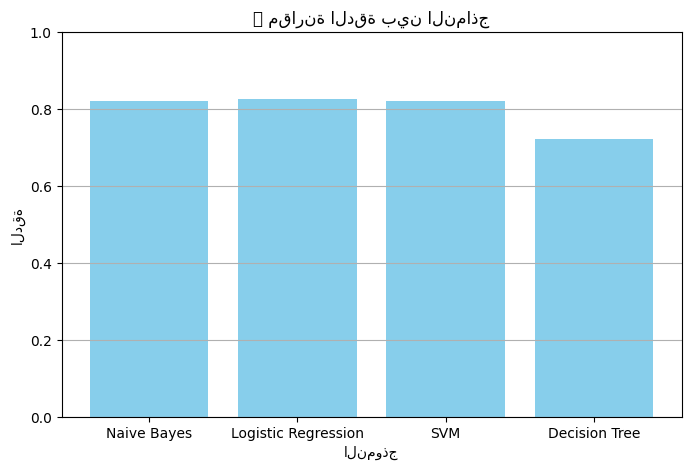

In [17]:
from sklearn.metrics import accuracy_score

# حفظ الدقة لكل نموذج
accuracy_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc

# رسم بياني شريطي
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('📊 مقارنة الدقة بين النماذج')
plt.xlabel('النموذج')
plt.ylabel('الدقة')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

In [18]:
import pickle

# حفظ جميع النماذج والـ vectorizer
for name, model in models.items():
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# حفظ TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [19]:
#Bidirectional يجعل النموذج يقرأ النص من كلا الاتجاهين، مما يساعد على الفهم السياقي بشكل أفضل.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Tokenization
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post')

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# تحويل y إلى تصنيف متعدد
label_encoder = LabelEncoder()
y_train_enc = to_categorical(label_encoder.fit_transform(y_train))
y_test_enc = to_categorical(label_encoder.transform(y_test))

# بناء نموذج LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # لأن لدينا 3 فئات: -1, 0, 1
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# تدريب النموذج
model.fit(X_train, y_train_enc, epochs=5, validation_data=(X_test, y_test_enc), batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7628 - loss: 0.6105 - val_accuracy: 0.8328 - val_loss: 0.4626
Epoch 2/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8528 - loss: 0.4083 - val_accuracy: 0.8311 - val_loss: 0.4597
Epoch 3/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8683 - loss: 0.3648 - val_accuracy: 0.8306 - val_loss: 0.4678
Epoch 4/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8774 - loss: 0.3349 - val_accuracy: 0.8271 - val_loss: 0.5224
Epoch 5/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8904 - loss: 0.3066 - val_accuracy: 0.8202 - val_loss: 0.5610


In [20]:
from tensorflow.keras.layers import GRU
model1 = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Bidirectional(GRU(64)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # لأن لدينا 3 فئات: -1, 0, 1
])

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

# تدريب النموذج
model1.fit(X_train, y_train_enc, epochs=5, validation_data=(X_test, y_test_enc), batch_size=32)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.7652 - loss: 0.5921 - val_accuracy: 0.8373 - val_loss: 0.4510
Epoch 2/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8527 - loss: 0.4061 - val_accuracy: 0.8318 - val_loss: 0.4670
Epoch 3/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8655 - loss: 0.3687 - val_accuracy: 0.8318 - val_loss: 0.4679
Epoch 4/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8795 - loss: 0.3306 - val_accuracy: 0.8276 - val_loss: 0.4898
Epoch 5/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8917 - loss: 0.2977 - val_accuracy: 0.8206 - val_loss: 0.5599


In [ ]:
# لتجربة النموذج على تقييمات جديدة (نصوص جديدة لم تُستخدم أثناء التدريب)، تحتاج إلى:

# تحويل النصوص الجديدة إلى تسلسلات باستخدام نفس الـtokenizer الذي استخدمته أثناء التدريب.

# عمل padding بنفس الإعداد (طول التسلسل).

# استخدام النموذج (model.predict) للحصول على احتمالات كل فئة.

# ترجمة النتيجة إلى فئة (التقييم).

In [21]:
# نصوص جديدة
new_reviews = [
    "التطبيق ممتاز وسهل الاستخدام",
    "خدمة العملاء سيئة جدًا",
    "لا يوجد اتصال بالإنترنت"
]

# 1. تحويل النصوص إلى تسلسلات بنفس الـtokenizer
new_seq = tokenizer.texts_to_sequences(new_reviews)

# 2. padding بنفس الطول
new_padded = pad_sequences(new_seq, maxlen=100, padding='post')

# 3. توقع التقييمات
pred_probs = model.predict(new_padded)  # مصفوفة احتمالات لكل فئة

# 4. الحصول على الفئة ذات الاحتمال الأكبر
pred_classes = pred_probs.argmax(axis=1)

# 5. ترجمة الفئات المشفرة إلى التقييمات الأصلية
# لأننا استخدمنا LabelEncoder لفك الترميز، نستخدم inverse_transform
pred_ratings = label_encoder.inverse_transform(pred_classes)

# طباعة النتائج
for review, rating in zip(new_reviews, pred_ratings):
    print(f"📝 النص: {review}\n🔮 التقييم المتوقع: {rating}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
📝 النص: التطبيق ممتاز وسهل الاستخدام
🔮 التقييم المتوقع: 1

📝 النص: خدمة العملاء سيئة جدًا
🔮 التقييم المتوقع: -1

📝 النص: لا يوجد اتصال بالإنترنت
🔮 التقييم المتوقع: 1



In [22]:
# 3. توقع التقييمات
pred_probs = model1.predict(new_padded)  # مصفوفة احتمالات لكل فئة

# 4. الحصول على الفئة ذات الاحتمال الأكبر
pred_classes = pred_probs.argmax(axis=1)

# 5. ترجمة الفئات المشفرة إلى التقييمات الأصلية
# لأننا استخدمنا LabelEncoder لفك الترميز، نستخدم inverse_transform
pred_ratings = label_encoder.inverse_transform(pred_classes)

# طباعة النتائج
for review, rating in zip(new_reviews, pred_ratings):
    print(f"📝 النص: {review}\n🔮 التقييم المتوقع: {rating}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
📝 النص: التطبيق ممتاز وسهل الاستخدام
🔮 التقييم المتوقع: 1

📝 النص: خدمة العملاء سيئة جدًا
🔮 التقييم المتوقع: -1

📝 النص: لا يوجد اتصال بالإنترنت
🔮 التقييم المتوقع: -1



In [27]:
from tensorflow.keras.layers import Embedding, SimpleRNN
import numpy as np
# Model 1: Simple RNN
num_classes = len(np.unique(y_train))
model_rnn = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    SimpleRNN(64),
    Dense(num_classes, activation='softmax')
])

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

history_rnn = model_rnn.fit(X_train, y_train_enc, epochs=5, validation_data=(X_test, y_test_enc), verbose=2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1002/1002 - 14s - 14ms/step - accuracy: 0.5975 - loss: 0.8245 - val_accuracy: 0.5958 - val_loss: 0.8291
Epoch 2/5
1002/1002 - 9s - 9ms/step - accuracy: 0.5914 - loss: 0.8294 - val_accuracy: 0.5958 - val_loss: 0.8286
Epoch 3/5
1002/1002 - 9s - 9ms/step - accuracy: 0.5963 - loss: 0.8235 - val_accuracy: 0.5958 - val_loss: 0.8280
Epoch 4/5
1002/1002 - 10s - 10ms/step - accuracy: 0.5970 - loss: 0.8220 - val_accuracy: 0.5772 - val_loss: 0.8347
Epoch 5/5
1002/1002 - 10s - 10ms/step - accuracy: 0.5962 - loss: 0.8229 - val_accuracy: 0.5958 - val_loss: 0.8278


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
# تحويل النص إلى تسلسل
max_length = 100
model_bilstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bilstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_bilstm.fit(X_train, y_train_enc, validation_split=0.1, epochs=5, batch_size=32)

Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7431 - loss: 0.6272 - val_accuracy: 0.8249 - val_loss: 0.4706
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8496 - loss: 0.4168 - val_accuracy: 0.8252 - val_loss: 0.4706
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8650 - loss: 0.3689 - val_accuracy: 0.8155 - val_loss: 0.5002
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8774 - loss: 0.3343 - val_accuracy: 0.8124 - val_loss: 0.5581
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8912 - loss: 0.3006 - val_accuracy: 0.8018 - val_loss: 0.5755


In [35]:
loss, accuracy = model_bilstm.evaluate(X_test, y_test_enc)
print(f"🔍 دقة نموذج BiLSTM: {accuracy:.2f}")

251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8126 - loss: 0.5697
🔍 دقة نموذج BiLSTM: 0.81


In [36]:
# 3. توقع التقييمات
pred_probs = model_bilstm.predict(new_padded)  # مصفوفة احتمالات لكل فئة

# 4. الحصول على الفئة ذات الاحتمال الأكبر
pred_classes = pred_probs.argmax(axis=1)

# 5. ترجمة الفئات المشفرة إلى التقييمات الأصلية
# لأننا استخدمنا LabelEncoder لفك الترميز، نستخدم inverse_transform
pred_ratings = label_encoder.inverse_transform(pred_classes)

# طباعة النتائج
for review, rating in zip(new_reviews, pred_ratings):
    print(f"📝 النص: {review}\n🔮 التقييم المتوقع: {rating}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
📝 النص: التطبيق ممتاز وسهل الاستخدام
🔮 التقييم المتوقع: 1

📝 النص: خدمة العملاء سيئة جدًا
🔮 التقييم المتوقع: -1

📝 النص: لا يوجد اتصال بالإنترنت
🔮 التقييم المتوقع: 0



In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
# بناء النموذج
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# تدريب
cnn_model.fit(X_train, y_train_enc, validation_data=(X_test, y_test_enc), epochs=5, batch_size=32)

Epoch 1/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7341 - loss: 0.6528 - val_accuracy: 0.8306 - val_loss: 0.4773
Epoch 2/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8483 - loss: 0.4289 - val_accuracy: 0.8333 - val_loss: 0.4636
Epoch 3/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8660 - loss: 0.3714 - val_accuracy: 0.8277 - val_loss: 0.4925
Epoch 4/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8830 - loss: 0.3174 - val_accuracy: 0.8210 - val_loss: 0.5444
Epoch 5/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8973 - loss: 0.2769 - val_accuracy: 0.8203 - val_loss: 0.5859


In [39]:
# 3. توقع التقييمات
pred_probs = cnn_model.predict(new_padded)  # مصفوفة احتمالات لكل فئة

# 4. الحصول على الفئة ذات الاحتمال الأكبر
pred_classes = pred_probs.argmax(axis=1)

# 5. ترجمة الفئات المشفرة إلى التقييمات الأصلية
# لأننا استخدمنا LabelEncoder لفك الترميز، نستخدم inverse_transform
pred_ratings = label_encoder.inverse_transform(pred_classes)

# طباعة النتائج
for review, rating in zip(new_reviews, pred_ratings):
    print(f"📝 النص: {review}\n🔮 التقييم المتوقع: {rating}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
📝 النص: التطبيق ممتاز وسهل الاستخدام
🔮 التقييم المتوقع: 1

📝 النص: خدمة العملاء سيئة جدًا
🔮 التقييم المتوقع: -1

📝 النص: لا يوجد اتصال بالإنترنت
🔮 التقييم المتوقع: -1



In [40]:
# Voting Classifier (دمج النماذج التقليدية)
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('nb', MultinomialNB()),
        ('svm', LinearSVC())
    ],
    voting='hard'  # أو soft إذا كنت تستخدم predict_proba
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print("\n🧪 Voting Classifier")
print(classification_report(y_test, y_pred_vote))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🧪 Voting Classifier
              precision    recall  f1-score   support

          -1       0.62      0.31      0.42      2832
           0       0.00      0.00      0.00       405
           1       0.66      0.91      0.76      4772

    accuracy                           0.65      8009
   macro avg       0.43      0.41      0.39      8009
weighted avg       0.61      0.65      0.60      8009



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
# #Stacking Classifier
# from sklearn.ensemble import StackingClassifier

# stack_clf = StackingClassifier(
#     estimators=[
#         ('lr', LogisticRegression(max_iter=1000)),
#         ('nb', MultinomialNB()),
#         ('svm', LinearSVC())
#     ],
#     final_estimator=LogisticRegression()
# )

# stack_clf.fit(X_train, y_train)
# y_pred_stack = stack_clf.predict(X_test)

# print("\n🔗 Stacking Classifier")
# print(classification_report(y_test, y_pred_stack))

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# بيانات نظيفة
texts = df['clean_review'].astype(str).tolist()
labels = df['rating'].tolist()

# ترميز التقييمات إلى فئات رقمية
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # -1, 0, 1 → 0, 1, 2
categorical_labels = to_categorical(encoded_labels, num_classes=3)

# Tokenization
vocab_size = 5000
max_len = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categorical_labels, test_size=0.2, random_state=42)


In [50]:
#Input → Embedding → Conv1D → MaxPooling → LSTM → Dense → Output
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

vocab_size = 5000
max_len = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5956 - loss: 0.8336 - val_accuracy: 0.8030 - val_loss: 0.5786
Epoch 2/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8184 - loss: 0.5334 - val_accuracy: 0.8338 - val_loss: 0.4692
Epoch 3/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8576 - loss: 0.4235 - val_accuracy: 0.8307 - val_loss: 0.4760
Epoch 4/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8712 - loss: 0.3710 - val_accuracy: 0.8317 - val_loss: 0.4760
Epoch 5/5
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8858 - loss: 0.3186 - val_accuracy: 0.8273 - val_loss: 0.5468


In [52]:
def predict_new(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_len, padding='post')
    probs = model.predict(padded)
    pred_classes = np.argmax(probs, axis=1)
    return label_encoder.inverse_transform(pred_classes)

# اختبار النموذج
new_reviews = [
    "تطبيق ممتاز جدًا وسهل الاستخدام",
    "لا يعمل التطبيق منذ يومين",
    "جيد لكن يحتاج تحسين"
]

predictions = predict_new(new_reviews)
for review, pred in zip(new_reviews, predictions):
    print(f"📝 \"{review}\" ➡️ التقييم المتوقع: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
📝 "تطبيق ممتاز جدًا وسهل الاستخدام" ➡️ التقييم المتوقع: 1
📝 "لا يعمل التطبيق منذ يومين" ➡️ التقييم المتوقع: -1
📝 "جيد لكن يحتاج تحسين" ➡️ التقييم المتوقع: 1


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# المتغيرات الأساسية
X = df['clean_review'].astype(str)
y = df['rating']  # -1, 0, 1

# تمثيل النصوص باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(X)

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# نموذج Bagging باستخدام LogisticRegression
bagging_model = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),
    n_estimators=10,
    random_state=42
)

bagging_model.fit(X_train, y_train)
y_pred_bag = bagging_model.predict(X_test)

print("📦 Bagging Classifier (Logistic Regression)")
print(classification_report(y_test, y_pred_bag))

📦 Bagging Classifier (Logistic Regression)
              precision    recall  f1-score   support

          -1       0.81      0.78      0.79      2832
           0       0.24      0.01      0.02       405
           1       0.83      0.92      0.88      4772

    accuracy                           0.83      8009
   macro avg       0.63      0.57      0.56      8009
weighted avg       0.80      0.83      0.80      8009



In [56]:
# نموذج آخر باستخدام Random Forest (ضمنيًا Bagging)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🌳 Random Forest")
print(classification_report(y_test, y_pred_rf))

🌳 Random Forest
              precision    recall  f1-score   support

          -1       0.77      0.78      0.77      2832
           0       0.21      0.01      0.03       405
           1       0.84      0.89      0.86      4772

    accuracy                           0.81      8009
   macro avg       0.61      0.56      0.55      8009
weighted avg       0.78      0.81      0.79      8009



In [59]:
#!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_enc)
y_pred_xgb = xgb_model.predict(X_test)

# فك ترميز النتائج إلى القيم الأصلية (-1, 0, 1)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)

from sklearn.metrics import classification_report
print("⚡ XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb_decoded))

⚡ XGBoost Classifier
              precision    recall  f1-score   support

          -1       0.82      0.69      0.75      2832
           0       0.35      0.02      0.04       405
           1       0.80      0.94      0.86      4772

    accuracy                           0.81      8009
   macro avg       0.66      0.55      0.55      8009
weighted avg       0.78      0.81      0.78      8009



In [58]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

print("⚡ AdaBoost Classifier")
print(classification_report(y_test, y_pred_ada))

⚡ AdaBoost Classifier
              precision    recall  f1-score   support

          -1       0.83      0.36      0.50      2832
           0       0.00      0.00      0.00       405
           1       0.68      0.97      0.80      4772

    accuracy                           0.70      8009
   macro avg       0.50      0.44      0.43      8009
weighted avg       0.70      0.70      0.65      8009



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# 📌 جدول النتائج
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Macro F1"]

# 📌 دالة لتحويل one-hot إلى تصنيفات (عند الحاجة)
def decode_if_needed(arr):
    return arr.argmax(axis=1) if isinstance(arr, np.ndarray) and len(arr.shape) > 1 and arr.shape[1] > 1 else arr

# 📌 دالة لحساب الأداء
def get_metrics(name, y_true, y_pred):
    y_true = decode_if_needed(y_true)
    y_pred = decode_if_needed(y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    table.add_row([name, f"{acc:.4f}", f"{f1:.4f}"])

# # ⬇️ النماذج التقليدية (TF-IDF)
get_metrics("Naive Bayes", y_test,nb_model.predict(X_test) )
get_metrics("Logistic Regression", y_test, lr_model.predict(X_test))
# get_metrics("SVM", y_test, y_pred_svm)
get_metrics("Random Forest", y_test, rf_model.predict(X_test))
get_metrics("Bagging (LogReg)", y_test, y_pred_bag)
get_metrics("AdaBoost", y_test, ada_model.predict(X_test))
get_metrics("XGBoost", y_test,xgb_model.predict(X_test))
#get_metrics("Voting Classifier", y_test, voting_clf.predict(X_test))
# get_metrics("Stacking Classifier", y_test, y_pred_stack)

# # ⬇️ عرض الجدول النهائي
print(table)

+---------------------+----------+----------+
|        Model        | Accuracy | Macro F1 |
+---------------------+----------+----------+
|     Naive Bayes     |  0.8191  |  0.5549  |
| Logistic Regression |  0.8251  |  0.5676  |
|    Random Forest    |  0.8088  |  0.5550  |
|   Bagging (LogReg)  |  0.8254  |  0.5630  |
|       AdaBoost      |  0.7030  |  0.4325  |
|       XGBoost       |  0.0184  |  0.0255  |
+---------------------+----------+----------+


In [77]:
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from tqdm import tqdm

# الجهاز (GPU إذا متوفر)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [79]:
from torch.utils.data import TensorDataset
def tokenize(batch):
    return tokenizer(batch["clean_review"],
                     padding='max_length',
                     truncation=True,
                     max_length=128)

dataset = dataset.map(tokenize, batched=True)

# تحويل البيانات إلى TensorDataset
train_dataset = dataset["train"]
test_dataset = dataset["test"]

train_inputs = torch.tensor(train_dataset["input_ids"])
train_masks = torch.tensor(train_dataset["attention_mask"])
train_labels = torch.tensor(train_dataset["label"])

test_inputs = torch.tensor(test_dataset["input_ids"])
test_masks = torch.tensor(test_dataset["attention_mask"])
test_labels = torch.tensor(test_dataset["label"])

train_data = TensorDataset(train_inputs, train_masks, train_labels)
test_data = TensorDataset(test_inputs, test_masks, test_labels)

# DataLoaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16)


Map:   0%|          | 0/32036 [00:00<?, ? examples/s]

Map:   0%|          | 0/8009 [00:00<?, ? examples/s]

In [80]:
optimizer = AdamW(model.parameters(), lr=2e-5)

In [81]:
from transformers import get_scheduler

epochs = 3
total_steps = len(train_loader) * epochs

lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps
)

loss_fn = torch.nn.CrossEntropyLoss()

# تدريب
model.train()
for epoch in range(epochs):
    print(f"🚀 Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0

    for batch in tqdm(train_loader):
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"✅ Average Loss: {avg_loss:.4f}")

🚀 Epoch 1/3


100%|██████████| 2003/2003 [11:32<00:00,  2.89it/s]


✅ Average Loss: 0.4385
🚀 Epoch 2/3


100%|██████████| 2003/2003 [11:39<00:00,  2.87it/s]


✅ Average Loss: 0.3597
🚀 Epoch 3/3


100%|██████████| 2003/2003 [11:39<00:00,  2.86it/s]

✅ Average Loss: 0.3063


In [82]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, attention_mask, labels = batch

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_.astype(str)))

📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.84      0.86      0.85      2825
           0       0.30      0.08      0.12       411
           1       0.88      0.93      0.90      4773

    accuracy                           0.86      8009
   macro avg       0.67      0.62      0.63      8009
weighted avg       0.84      0.86      0.85      8009



In [95]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(all_labels, all_preds)
print(f"🎯 Accuracy: {accuracy:.4f}")

🎯 Accuracy: 0.8604


In [96]:
from transformers import AutoTokenizer
import numpy as np

# تحميل الـ tokenizer (تأكد من اسم النموذج المستخدم سابقاً)
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")

# مثال على مراجعة جديدة بالعربية
new_review = "هذا التطبيق رائع جداً وسهل الاستخدام"

tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [97]:
def predict_sentiment(text):
    model.eval()
    inputs = tokenizer(
        text,
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors="pt"
    )

    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, axis=1).cpu().numpy()

    predicted_label = label_encoder.inverse_transform(preds)[0]
    return predicted_label

In [98]:
new_review = "واجهة التطبيق سيئة ولا تعمل بشكل جيد"
prediction = predict_sentiment(new_review)
print(f"📌 التصنيف المتوقع: {prediction}")

📌 التصنيف المتوقع: -1


In [99]:
new_review = "هذا التطبيق رائع جداً وسهل الاستخدام"
prediction = predict_sentiment(new_review)
print(f"📌 التصنيف المتوقع: {prediction}")

📌 التصنيف المتوقع: 1


In [101]:
new_review = "هذا التطبيق كويس و لكنه يحتاج إلى تعديل  "
prediction = predict_sentiment(new_review)
print(f"📌 التصنيف المتوقع: {prediction}")

📌 التصنيف المتوقع: -1


In [ ]:
# نريد تدريب نموذج BERT باللغة العربية على تصنيف التقييمات (3 فئات: سلبي -1، محايد 0، إيجابي 1) يدويًا باستخدام PyTorch.
# المكونات:
# تجهيز البيانات

# ترميز النصوص

# تحويل البيانات إلى Tensors

# بناء DataLoader

# تدريب النموذج يدويًا

# التقييم على مجموعة الاختبار

# torch: مكتبة التعلم العميق (PyTorch).

# AdamW: خوارزمية تحسين (optimizer) مخصصة لـ Transformers.

# AutoTokenizer و AutoModelForSequenceClassification: لتحميل نموذج Transformer باللغة العربية.

# tqdm: لعرض شريط تقدم التدريب.

# يتم تحميل نموذج AraBERT مع رأس تصنيف (num_labels=3 لأننا نريد 3 فئات).

# تحويل النصوص إلى تمثيل رقمي (Tokenization)
# padding='max_length': يضيف أصفار padding لتساوي الطول 128.

# truncation=True: يقطع الجملة لو تجاوزت 128 رمزًا.
# تحويل البيانات إلى Tensors
# نحول كل عناصر البيانات (input_ids, attention_mask, labels) إلى torch.tensor.
# إنشاء DataLoader لتغذية النموذج
# DataLoader يُستخدم لتقسيم البيانات إلى "مجموعات صغيرة" (batches) أثناء التدريب.
# ننقل النموذج إلى GPU إن وُجد.

# AdamW: Optimizer مخصص لـ BERT.

# CrossEntropyLoss: دالة خسارة متعددة الفئات.

# model.train(): يدخل النموذج في وضع التدريب.

# لكل batch:

# نحسب التنبؤات.

# نحسب الخسارة.

# نُجري backpropagation.

# نُحدث الأوزان.

In [ ]:
# Updated Model: Add Another LSTM Layer
# You can stack multiple LSTM layers to create a deep LSTM network . However, when stacking LSTMs, you need to set return_sequences=True in all LSTM layers except the last one ,
# so that they pass sequences to the next recurrent layer

In [ ]:
# Embedding Layer : Converts word indices into dense vectors.
# First LSTM Layer : Learns sequential patterns and returns full sequence (return_sequences=True) for next LSTM layer.
# Second LSTM Layer : Learns higher-level patterns from the outputs of the first LSTM.
# Dense Layer : Final softmax layer for multiclass classification (num_classes = 3 in your case: -1, 0, 1).

In [ ]:
# Increase epochs to 10–15 to give the model more time to learn.
# Monitor validation accuracy/loss to avoid overfitting.
# Consider using early stopping and learning rate scheduling :